In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc,style
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

style.use('ggplot')
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
df = pd.read_csv('total(초등학교,주차제외).csv').drop(['Unnamed: 0'],axis=1)
df

,행정동코드,5~14세,시군구명,행정동명,병원수,도서관,박물관/미술관,지하철역,버스정류장,유통개수,...,공장_개수,공장_건축면적(㎡),총전입,총전출,구내전입,구내전출,구간전입,구간전출,시ㆍ도간전입,시ㆍ도간전출
0,1111051500,2857,종로구,청운효자동,6,3.0,1.0,0.0,25.0,0,...,1.0,0.00,1457.0,1780.0,262.0,336.0,649.0,850.0,546,594.0
1,1111053000,3331,종로구,사직동,37,0.0,5.0,2.0,24.0,1,...,4.0,0.00,1615.0,1631.0,288.0,345.0,827.0,829.0,500,457.0
2,1111054000,1636,종로구,삼청동,86,1.0,7.0,0.0,23.0,0,...,2.0,0.00,342.0,414.0,82.0,83.0,135.0,191.0,125,140.0
3,1111055000,454,종로구,부암동,12,0.0,5.0,0.0,60.0,0,...,1.0,0.00,1239.0,1300.0,270.0,243.0,628.0,633.0,341,424.0
4,1111056000,734,종로구,평창동,65,1.0,6.0,0.0,34.0,5,...,2.0,0.00,1938.0,2210.0,303.0,233.0,980.0,1163.0,655,814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1174065000,736,강동구,성내제2동,12,0.0,0.0,1.0,25.0,0,...,0.0,0.00,3997.0,4595.0,1210.0,1741.0,1514.0,1243.0,1273,1611.0
421,1174066000,1174,강동구,성내제3동,15,1.0,0.0,1.0,25.0,0,...,0.0,0.00,3390.0,3718.0,1130.0,1405.0,1224.0,859.0,1036,1454.0
422,1174068500,675,강동구,길동,28,0.0,0.0,1.0,16.0,0,...,0.0,0.00,6302.0,7127.0,2103.0,2705.0,1905.0,1556.0,2294,2866.0
423,1174069000,1720,강동구,둔촌제1동,8,0.0,0.0,0.0,46.0,0,...,1.0,1109.58,3.0,32.0,0.0,9.0,3.0,6.0,0,17.0


In [9]:
df.columns

Index(['행정동코드', '5~14세', '시군구명', '행정동명', '병원수', '도서관', '박물관/미술관', '지하철역',
       '버스정류장', '유통개수', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)',
       '공동주택_연면적(㎡)', '공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수', '공장_개수',
       '공장_건축면적(㎡)', '총전입', '총전출', '구내전입', '구내전출', '구간전입', '구간전출', '시ㆍ도간전입',
       '시ㆍ도간전출'],
      dtype='object')

GRA 전후 차이 비교하기 위해 히트맵 그려보자

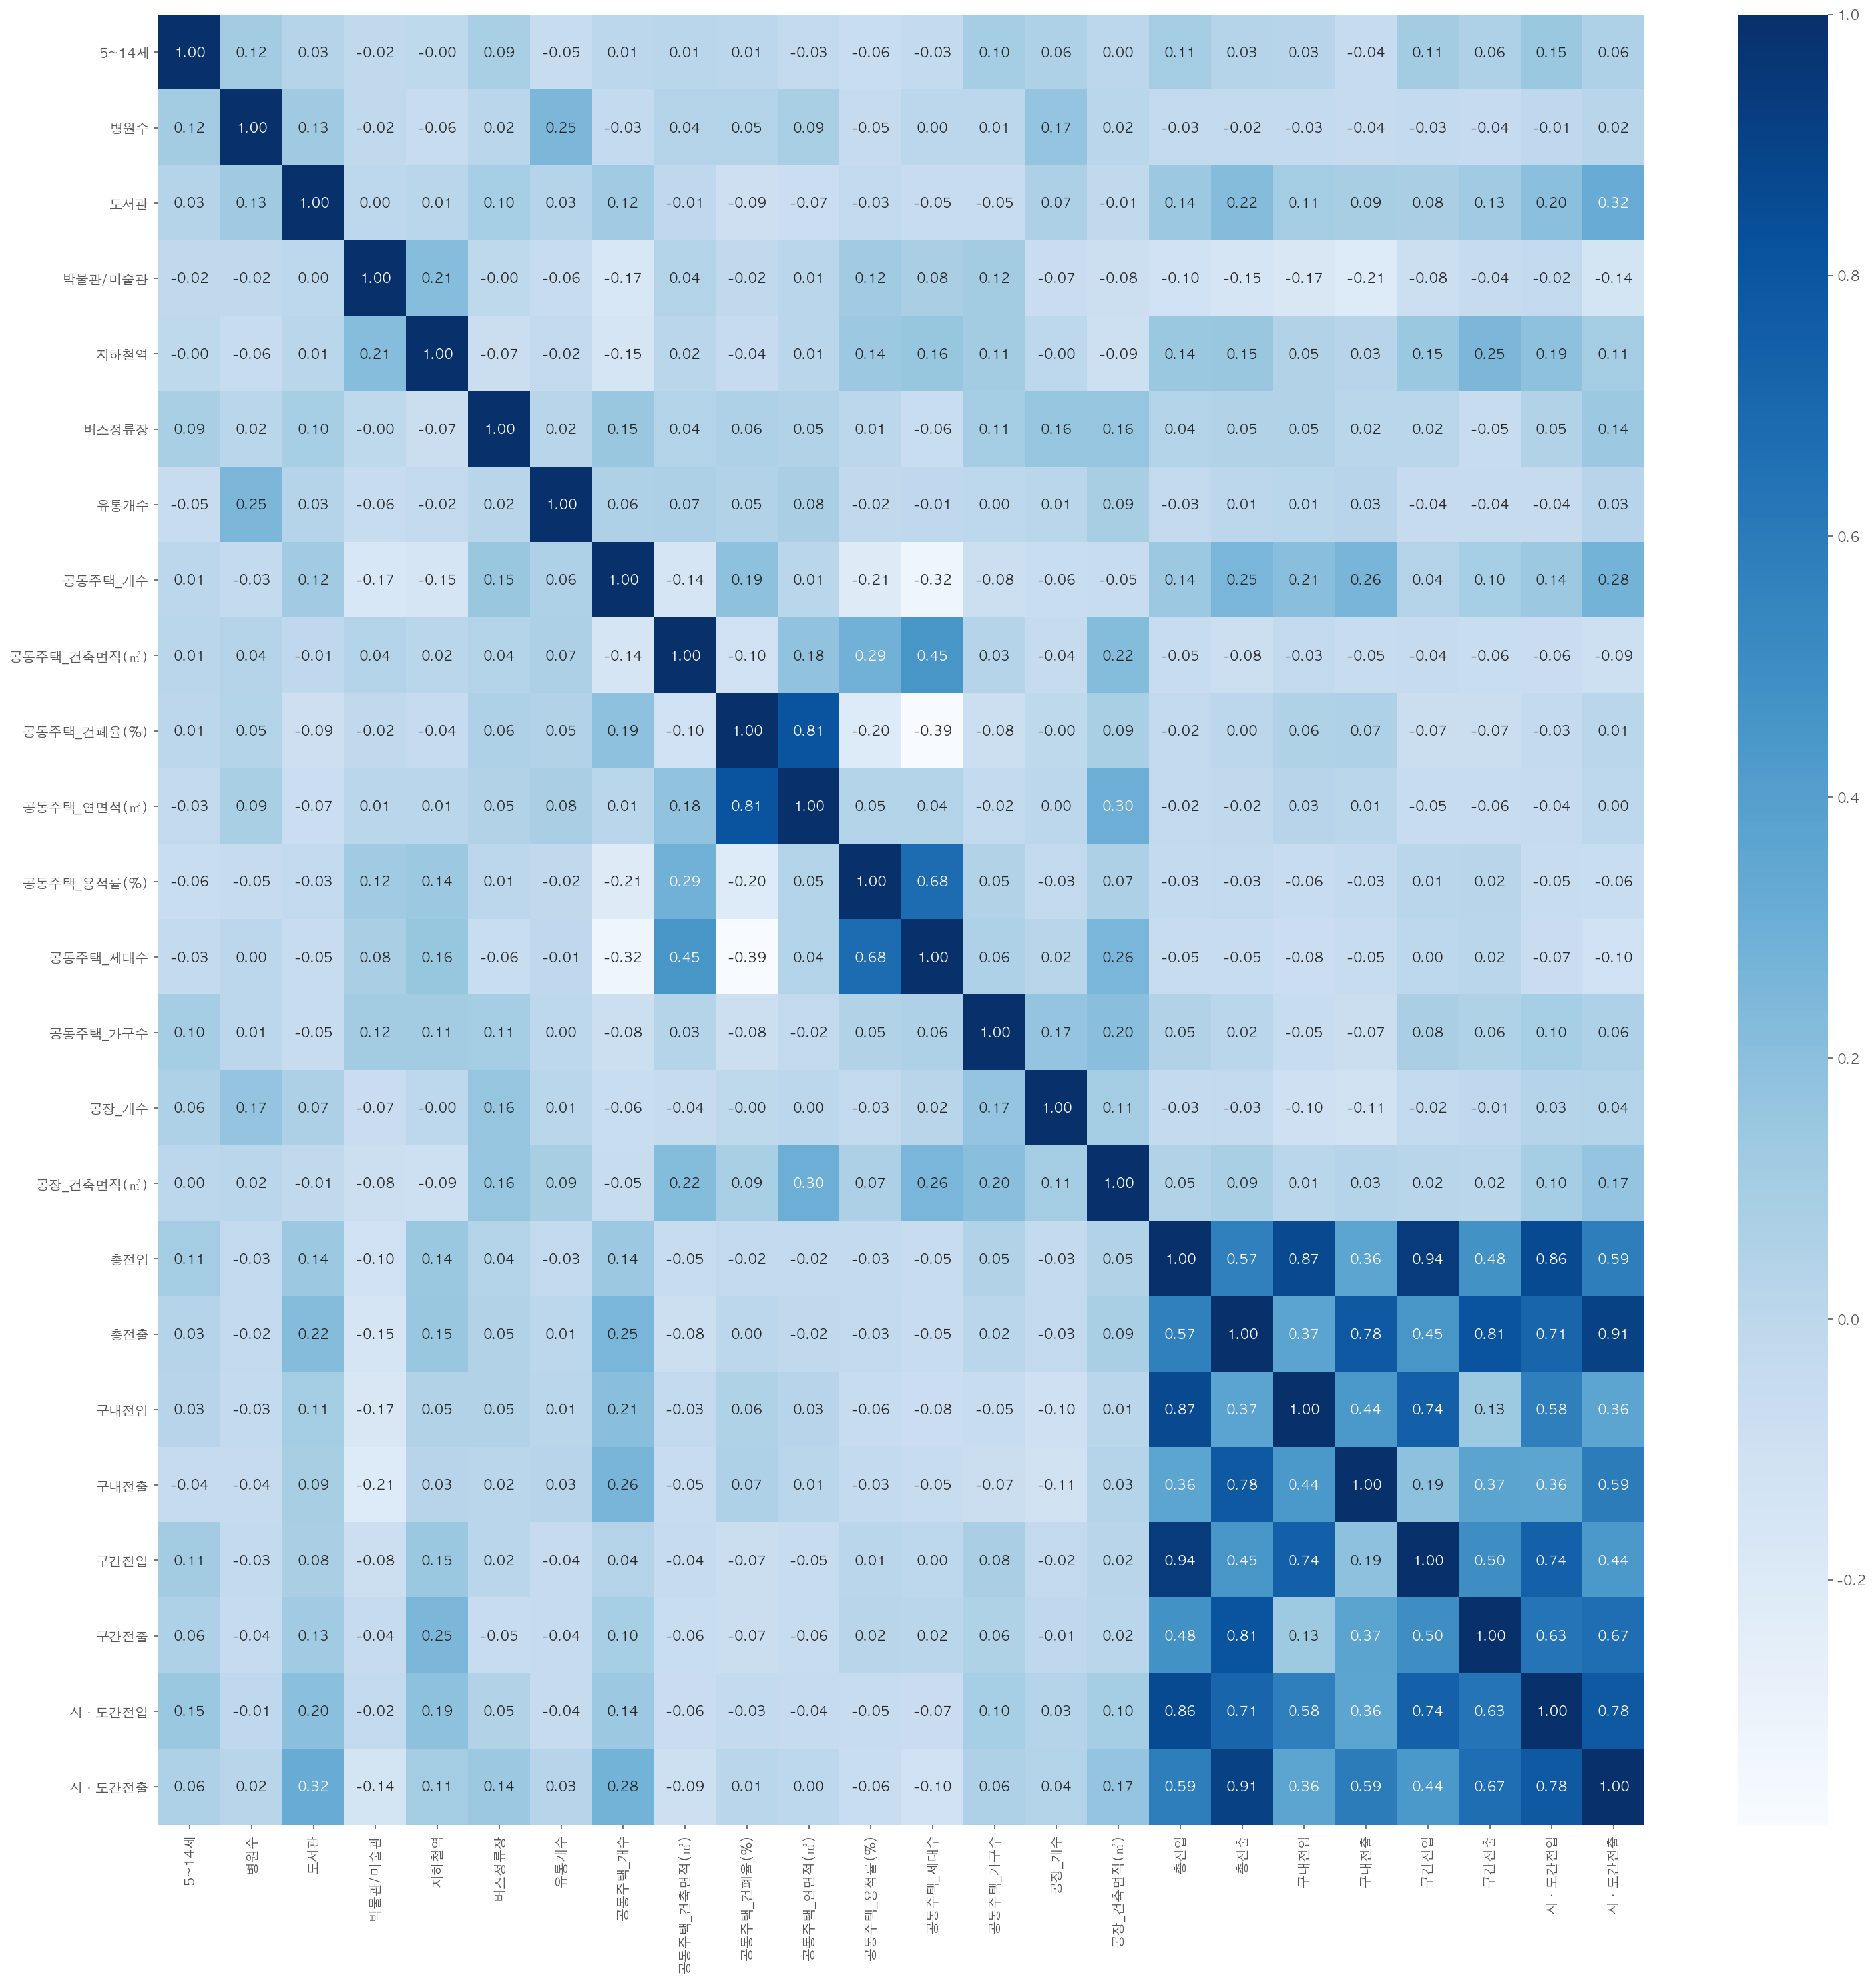

In [27]:
plt.figure(figsize=(25,25))
sns.heatmap(data=df[['5~14세', '병원수', '도서관', '박물관/미술관', '지하철역',
       '버스정류장', '유통개수', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)',
       '공동주택_연면적(㎡)', '공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수', '공장_개수',
       '공장_건축면적(㎡)', '총전입', '총전출', '구내전입', '구내전출', '구간전입', '구간전출', '시ㆍ도간전입',
       '시ㆍ도간전출']].corr(),annot=True,fmt='.2f',cmap='Blues')

**회색이론 참고논문**<br>
[본 연구](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.894.7524&rep=rep1&type=pdf)에서는 부족한 정보와 다목적 함수를 고려하기 위
해 회색 관계 분석을 사용하였다. 회색이론(Grey Theory)은
정보가 전혀 없는 상태를 검은색으로 모든 정보가 있는 상태
를 흰색으로 정의하고, 정보가 부족하거나 정확하게 결정되
지 않은 경우의 상태를 회색 상태라고 정의한다(Wu, 1996).
회색이론에 따라 정보가 부족한 상태의 시스템을 회색 시스
템이라고 정의할 수 있다. 회색 시스템과 회색 현상에 대한
주요 용어는 다음의 세 가지 용어가 있다. 첫 번째는 회색수
(Grey Number)이고 시스템에서 부족한 정보의 수를 의미한
다. 두 번째는 회색요소(Grey Element)이고 부족한 정보의 요
소를 말한다. 마지막 세 번째 요소인 회색 관계(Grey
Relation)는 부족한 정보들 사이의 관계를 말한다.
회색 이론의 가장 큰 장점은 부족한 정보와 명확하지 않은
문제에 대해 정도 높게 다룰 수 있으며, 특히 충분한 데이터가 없는 경우에도 분석도구로서 사용이 가능하다(Wu, 1996;
Chiang, 1997). 회색 관계 분석으로 다목적 함수와 파라미터
의 상관 정도를 얻을 수 있으며, Lin et al.(2002)은 다구치
방법에서 다목적 문제를 풀기 위해 회색 관계 분석을 이용한
방법을 제안하였다. 다구치 실험 계획법을 이용한 그레이 상
관 분석을 수행하는 순서는 다음의 7단계를 통해 수행된다
(Krishnaiah and Shahabudeen, 2012).

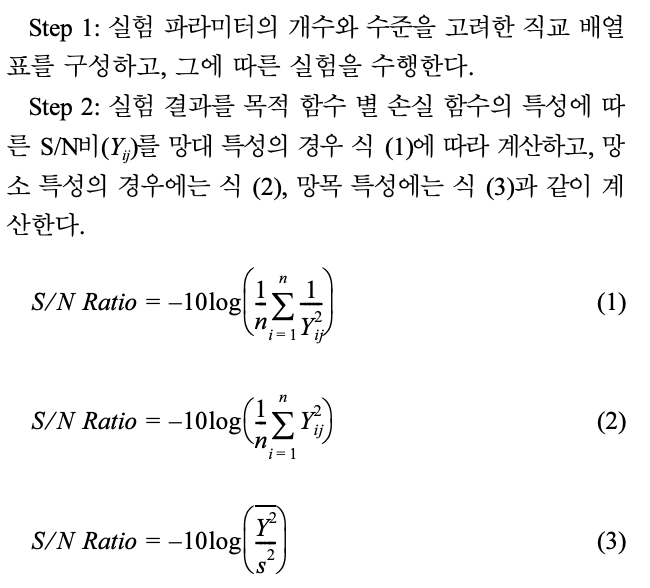

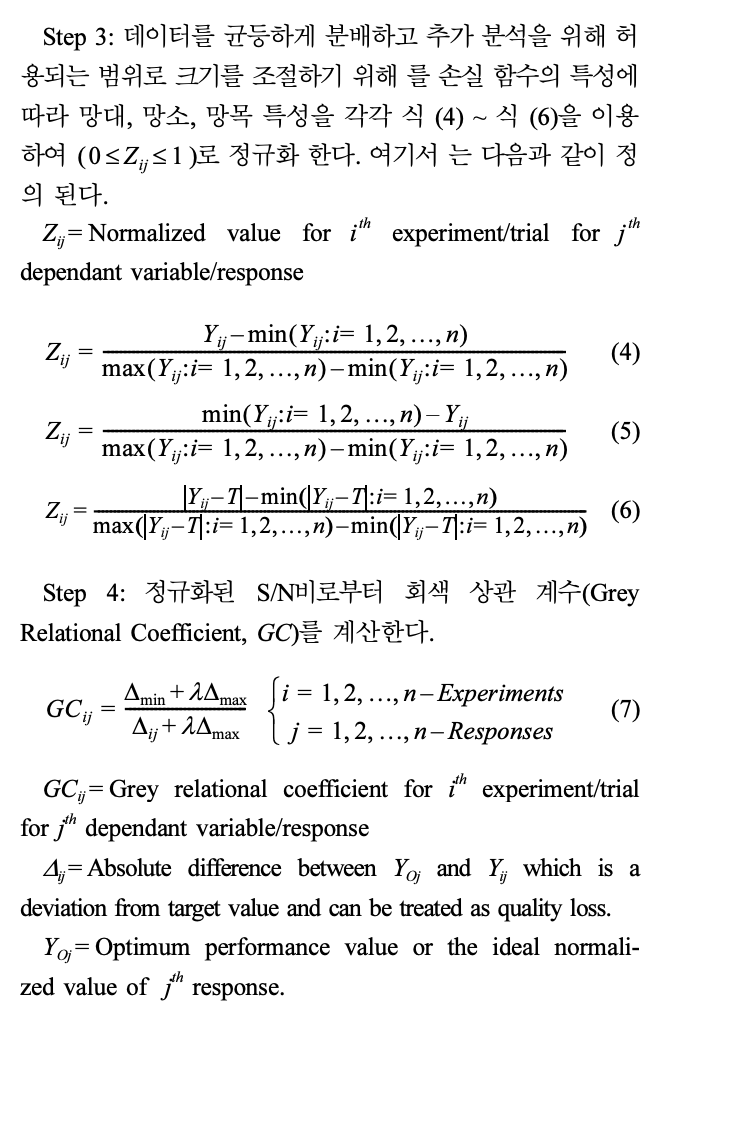

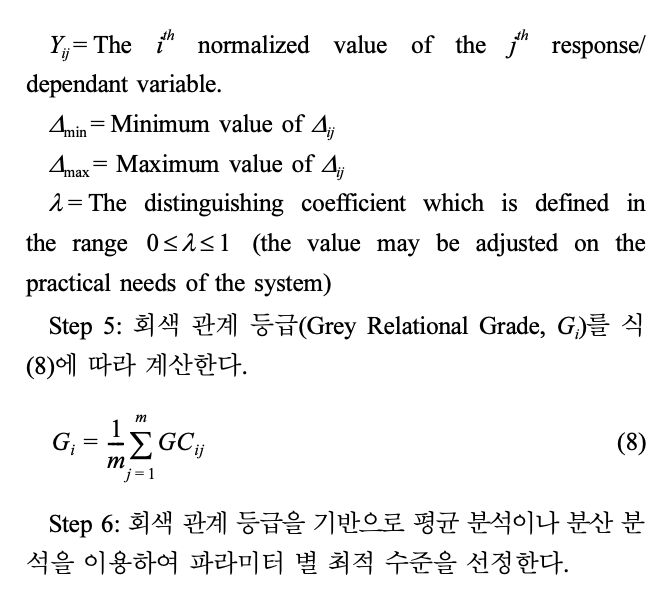

## Module/ buildmodel.py

In [12]:
BASE_DIR = os.path.dirname(os.path.abspath('__file__'))

In [37]:
# -*- coding: utf-8 -*-
class GraModel():
    def __init__(self,inputData,p=0.5,standard=True,normalize=True):
        '''
        p: range 0~1，Generally take 0.5，
        The smaller the correlation coefficient is, 
        the greater the difference is, and the stronger the discrimination ability is
        '''
        self.inputData = np.array(inputData)
        self.p = p
        self.standard = standard
        self.normalize = normalize
        self.standarOpt()
        self.normalizOpt()
        self.buildModel()
        
    # 분석을 할 때는 데이터 표준화를 통해 outlier를 제거하고 나서 데이터 정규화를 하여 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다. 
    # standardization
    def standarOpt(self):
        if not self.standard:
            return None
        self.scaler = StandardScaler().fit(self.inputData) 
        self.inputData = self.scaler.transform(self.inputData)
    
    # normalization
    def normalizOpt(self):
        if not self.normalize:
            return None
        self.scaler = MinMaxScaler().fit(self.inputData) 
        self.inputData = self.scaler.transform(self.inputData)
        
    # modeling
    def buildModel(self):
        # 첫번째 컬럼을 대상으로
        momCol = self.inputData[:,0]
        sonCol = self.inputData[:,0:]
        for col in range(sonCol.shape[1]):
            sonCol[:,col] = abs(sonCol[:,col]-momCol)
        #최대 최소값 찾기
        minMin = sonCol.min()
        maxMax = sonCol.max()
        # 정규화된 S/N비로부터 회색 상관 계수(Grey Relational Coefficient, GC)를 계산
        cors = (minMin + self.p*maxMax)/(sonCol+self.p*maxMax)
        # 회색 관계 등급(Grey Relational Grade, Gi)를 식(8)에 따라 계산 --> corr degree 중 평균 찾기
        meanCors = cors.mean(axis=0)
        # 회색 관계 등급을 기반으로 평균 분석이나 분산 분석을 이용하여 파라미터 별 최적 수준을 선정
        self.result = {'cors':{'value':cors,'desc':'Correlation coefficient matrix'},'meanCors':{'value':meanCors,'desc':'Average comprehensive correlation coefficient'}}

if __name__ == "__main__":
    #Path directory
    curDir = os.path.dirname(os.path.abspath('__file__'))#current directory
    baseDir = os.path.dirname(curDir)#root directory
    staticDir = os.path.join(baseDir,'Static')#Static file directory
    resultDir = os.path.join(baseDir,'Result')#Results file directory
    data = np.array(data).T   # 실험 파라미터의 개수와 수준을 고려한 직교 배열표를 구성하고, 그에 따른 실험을 수행
    model = GraModel(data,standard=True)
    

## Main.py

Text(0.5, 1.0, 'Gray Correlation Matrix')

<Figure size 432x288 with 0 Axes>

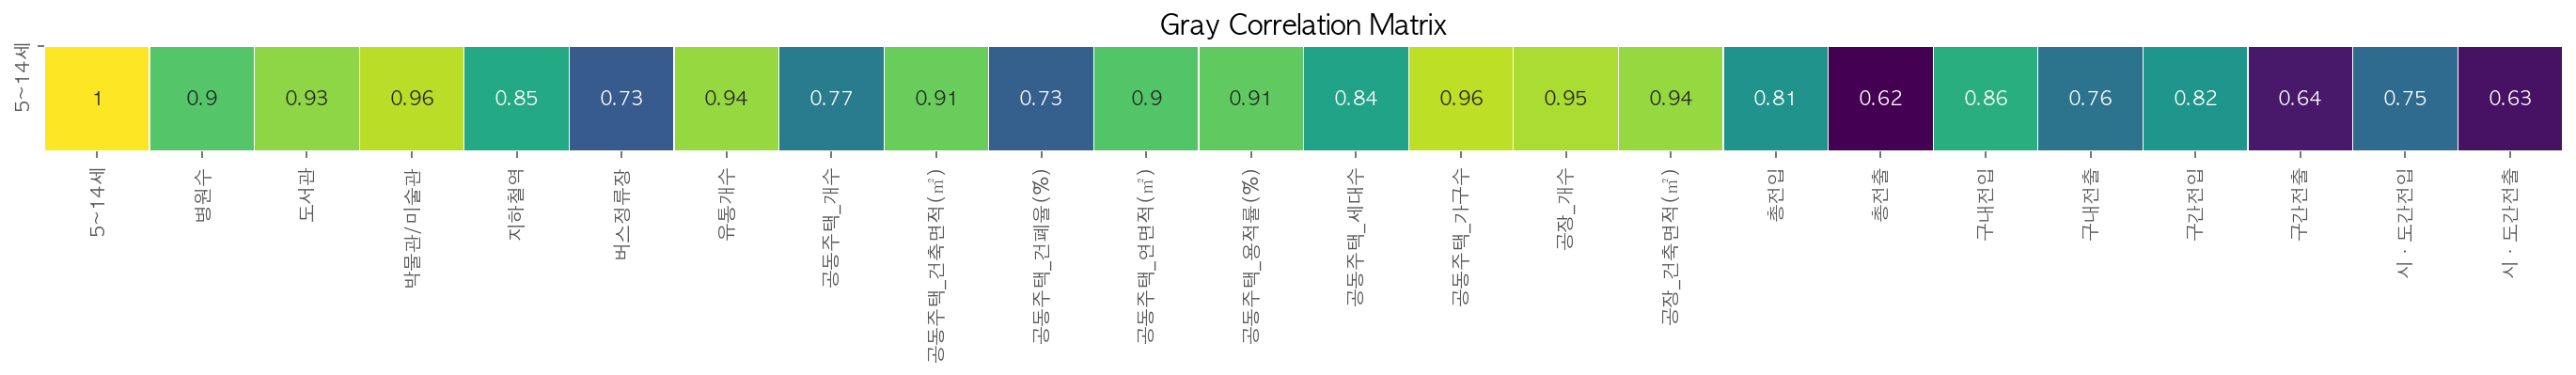

In [38]:
# -*- coding: utf-8 -*-
#Path directory
baseDir = os.path.dirname(os.path.abspath('__file__'))#current directory
staticDir = os.path.join(baseDir,'Static')#Static file directory
resultDir = os.path.join(baseDir,'Result')#Results file directory


data = pd.read_csv('total(초등학교,주차제외).csv').drop(['Unnamed: 0'],axis=1)
columns = ['5~14세', '병원수', '도서관', '박물관/미술관', '지하철역',
       '버스정류장', '유통개수', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)',
       '공동주택_연면적(㎡)', '공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수', '공장_개수',
       '공장_건축면적(㎡)', '총전입', '총전출', '구내전입', '구내전출', '구간전입', '구간전출', '시ㆍ도간전입',
       '시ㆍ도간전출']
data = data[columns]

#grey relation 모델 및 표준화 데이터
model = GraModel(data,standard=True)
result = model.result
meanCors = result['meanCors']['value']


# 시각화
plt.clf()
plt.figure(figsize=(24,12))
sns.heatmap(meanCors.reshape(1,-1), square=True, annot=True,  cbar=False,
            vmax=1.0,
            linewidths=0.1,cmap='viridis')
plt.yticks([0,],['5~14세'])
plt.xticks(np.arange(0.5,24.5,1),columns,rotation=90)
plt.title('Gray Correlation Matrix')

GRA가 고려되지 않은 상관계수 히트맵과 고려된 상관계수가 다르게 나타남

In [41]:
result

{'cors': {'value': array([[1.        , 0.98159509, 0.83783784, ..., 0.71457558, 0.84827011,
          0.77025682],
         [1.        , 0.89635854, 1.        , ..., 0.71968665, 0.85925405,
          0.81469783],
         [1.        , 0.78817734, 0.93939394, ..., 0.91949521, 0.9606609 ,
          0.94021871],
         ...,
         [1.        , 0.91954023, 1.        , ..., 0.57684958, 0.57093426,
          0.404411  ],
         [1.        , 0.97560976, 1.        , ..., 1.        , 1.        ,
          1.        ],
         [1.        , 0.8815427 , 1.        , ..., 0.6693063 , 0.7374079 ,
          0.56539529]]),
  'desc': 'Correlation coefficient matrix'},
 'meanCors': {'value': array([1.        , 0.89748657, 0.9343727 , 0.96022679, 0.84784314,
         0.72669787, 0.93953669, 0.77497345, 0.91340979, 0.73150286,
         0.89588535, 0.90742879, 0.83948107, 0.96264385, 0.95116846,
         0.94003618, 0.81455123, 0.618032  , 0.85913754, 0.76334134,
         0.81828276, 0.6419767 , 0.74

In [40]:
len(result['cors']['value'])

425